### Лабораторная работа №3

#### Теория погрешностей и машинная арифметика

Прокопьев Григорий, БПМ171 \
Вариант 21 (1.1.21, 1.8, 1.2.6, 1.7, 1.6, 1.9.4)

#### Задача 1.1.21

Дан ряд $\sum_{n=0}^{\infty} a_n$. Найти сумму ряда аналитически. Вычислить значения частичных сумм ряда $S_N = \sum_{n=0}^{N} a_n$ и найти величину погрешности при $N = 10, 10^2, 10^3, 10^4, 10^5$. Построить гистограмму зависимости верных цифр результата от $N$.

Аналитическое решение задачи: \
$$S_N = \sum_{n=0}^N \frac{24}{7(n^2 + 8n + 15)} = \frac{24}{7}\sum_{n=0}^N \frac{1}{(n+3)\cdot(n+5)} = \frac{24}{14} \sum_{n=0}^N (\frac{1}{n+3} - \frac{1}{n+5}) = \frac{12}{7}\cdot(\frac{1}{3} + \frac{1}{4} - \frac{1}{N+4} - \frac{1}{N+5})$$

$$S = \lim_{N\to\infty} S_N = \frac{12}{7}\cdot(\frac{1}{3} + \frac{1}{4} - \frac{1}{N+4} - \frac{1}{N+5}) = \frac{12}{7}\cdot \frac{7}{12} = 1$$

In [1]:
def get_partial_sum(N):
    sum_ = 0.0
    for i in range(int(N)+1):
        sum_ += 1/(i**2 + 8*i + 15)
        
    return 24*sum_/7

In [2]:
N = [1e1, 1e2, 1e3, 1e4, 1e5]
sums = []
abs_errors = []
for n in N:
    sum_ = get_partial_sum(n)
    sums.append(sum_)
    abs_errors.append(1 - sum_)

In [3]:
import pandas as pd
df = pd.DataFrame({
    'N': N,
    'Частичная сумма ряда': sums,
    'Абсолютная погрешность': abs_errors
})
df.N = df.N.astype(int)
df

,N,Частичная сумма ряда,Абсолютная погрешность
0,10,0.763265,0.236735
1,100,0.967190,0.032810
2,1000,0.996587,0.003413
3,10000,0.999657,0.000343
4,100000,0.999966,0.000034


Используя определение верной цифры числа, определим количество верных цифр частичной суммы для каждого $N$:

In [4]:
right_digits = [0, 1, 2, 3, 4]
df['Количество верных цифр'] = right_digits
df

,N,Частичная сумма ряда,Абсолютная погрешность,Количество верных цифр
0,10,0.763265,0.236735,0
1,100,0.967190,0.032810,1
2,1000,0.996587,0.003413,2
3,10000,0.999657,0.000343,3
4,100000,0.999966,0.000034,4


Как видно из приведенного вычислительного эксперимента, увеличение числа членов ряда в 10 раз по сравнению с предыдущим случаем увеличивает число верных цифр в ответе на 1 \

Гистограмма:

In [5]:
import matplotlib.pyplot as plt

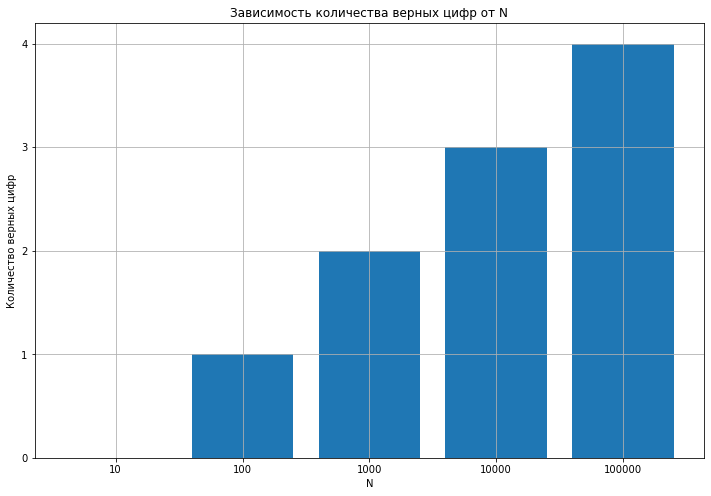

In [6]:
plt.figure(figsize=(12, 8))

plt.title('Зависимость количества верных цифр от N')
plt.ylabel('Количество верных цифр')
plt.xlabel('N')

plt.grid()
plt.bar(range(len(right_digits)), right_digits)
plt.yticks(right_digits)
plt.xticks(range(5), df.N.values)
plt.show()

#### Задача 1.8

Составить программу, моделирующую вычисления на ЭВМ с ограниченной разрядностью $m$. Решить задачу 1.1 для случая $N = 10000$, используя эту программу. Составить график зависимости погрешности от количества разрядов $m = 4, 5, \dots, 8$

In [7]:
def partial_bitness_sum(N, m):
    sum_ = 0.0
    for i in range(N+1):
        sum_ += round(24/(7*(i**2 + 8*i + 15)), m)
    return round(sum_, m)

In [8]:
N = int(1e5)
M = list(range(4,9))
partial_abs_errors = []

for m in M:
    partial_abs_errors.append(1 - partial_bitness_sum(N, m))

График зависимости абсолютной погрешности от количества разрядов:

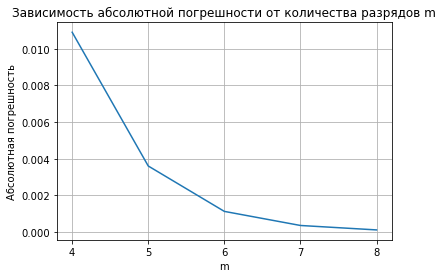

In [9]:
plt.title('Зависимость абсолютной погрешности от количества разрядов m')
plt.ylabel('Абсолютная погрешность')
plt.xlabel('m')

plt.plot(M, partial_abs_errors)
plt.xticks(M)
plt.grid()
plt.show()

#### Задача 1.2.6

Дана матрица $A = \begin{pmatrix} a_{11} & a_{12} & a_{13}\\ a_{21} & a_{22} & a_{23}\\ a_{31} & a_{32} & a_{33}\\ \end{pmatrix}$. В каждый из диагональных элементов матрицы A по очереди внести погрешность в 1%. Как изменился определитель матрицы А? Указать количество верных цифр и вычислить величину относительной погрешности определителя в каждом случае. 

$$A = \begin{pmatrix} 3 & 1 & 13 \\ 5 & 3 &15 \\ 11 & 5 & 40 \end{pmatrix}$$

In [10]:
import numpy as np

In [11]:
A = np.array([[3, 1, 13],
              [5, 3, 15],
              [11, 5, 40]], dtype=np.float)

In [12]:
true_det = np.linalg.det(A)
dets = []
abs_errors = []
rel_errors = []

for i in range(len(A)):
    B = A.copy()
    
    B[i,i] *= 1.01
    det = np.linalg.det(B)
    abs_err = np.abs(true_det - det)
    rel_err = abs_err/np.abs(true_det)
    
    dets.append(det)
    abs_errors.append(abs_err)
    rel_errors.append(rel_err)

In [13]:
true_det

-3.999999999999999

In [14]:
df = pd.DataFrame({
    'Определитель': dets,
    'Абсолютная ошибка': abs_errors,
    'Относительная ошибка': rel_errors,
})
df

,Определитель,Абсолютная ошибка,Относительная ошибка
0,-2.65,1.35,0.3375
1,-4.69,0.69,0.1725
2,-2.40,1.60,0.4000


Используя определение верной цифры числа, определим количество верных цифр для каждого значения определителя:

In [15]:
right_digits = [0, 1, 0]
df['Количество верных цифр'] = right_digits
df

,Определитель,Абсолютная ошибка,Относительная ошибка,Количество верных цифр
0,-2.65,1.35,0.3375,0
1,-4.69,0.69,0.1725,1
2,-2.40,1.60,0.4000,0


$\textbf{Замечание:}$ в таблице значения определителей с внесенными погрешностями указаны по очереди начиная с первого диагонального элемента

#### Задание 1.6

Для пакета MATHCAD найти значения машинного нуля, машинной бесконечности, машинного эпсилон. 

$\textbf{Примечание:}$ Вместо пакета MATHCAD будет использован С++.

См. прикрепленный файл Source.cpp

Вывод программы:

<div style='float:left'><img width=800 src="image.png" alt="Python"></img></div>

(нужно, чтобы image.png находился в одной директории с данным ipynb файлом)

#### Задание 1.7

Вычислить значения машинного нуля, машинной бесконечности, машинного эпсилон в режимах одинарной и двойной точности на алгоритмическом языке. Сравнить результаты с результатами задачи 1.6.

In [16]:
def machine_epsilon(precision):
    i = 0
    epsilon = precision(1)
    while precision(1 + epsilon) != 1:
        epsilon /= 2
        i += 1
    return 2.0**(-i + 1)

In [17]:
def machine_zero(precision):
    i = 0
    zero = precision(1)
    while precision(zero) != 0:
        zero /= 2
        i += 1
    return 2.0**(-i + 1)

In [18]:
def machine_infinity(precision):
    i = 0
    inf = 1
    while inf != np.inf:
        try:
            inf = precision(2.0*inf)
        except OverflowError:
            return 2.0**(i - 1)
        i += 1
    return 2.0**(i - 1)

Одинараная точность:

In [19]:
prec = np.float32
print('Machine epsilon: {}'.format(machine_epsilon(prec)))
print('Machine zero: {}'.format(machine_zero(prec)))
print('Machine infinity: {}'.format(machine_infinity(prec)))

Machine epsilon: 1.1920928955078125e-07
Machine zero: 1.401298464324817e-45
Machine infinity: 1.7014118346046923e+38


Двойная точность:

In [20]:
prec = np.float64
print('Machine epsilon: {}'.format(machine_epsilon(prec)))
print('Machine zero: {}'.format(machine_zero(prec)))
print('Machine infinity: {}'.format(machine_infinity(prec)))

Machine epsilon: 2.220446049250313e-16
Machine zero: 5e-324
Machine infinity: 8.98846567431158e+307


c:\users\proko\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


Как видно, результаты совпали с пунктом 1.6

#### Задача 1.9.4

Для матрицы A решить вопрос о существовании обратной матрицы  в следующих случаях: 
1. элементы матрицы заданы точно; 
2. элементы матрицы заданы приближенно с относительной погрешностью  a) $δ =α\%$ и  b) $δ = β\%$.  Найти 
относительную погрешность результата.

$A = \begin{pmatrix} 9 & 5 & 6\\ 13.5 & 9.5 & 11\\ 8 & 4 & 5 \\ \end{pmatrix}$ \
$\alpha = 0.1$ \
$\beta = 0.5$

In [21]:
A = np.array([[9, 5, 6],
              [13.5, 9.5, 11],
              [8, 4, 5]], dtype=np.float)

In [22]:
true_det = np.linalg.det(A)
true_det

2.0000000000000178

In [23]:
import itertools
def get_appr_dets(A, alpha, true_det):
    dets = []
    rel_errors = []
    dim = A.shape[0] * A.shape[1]
    iter_matrices = itertools.product([0,1], repeat = dim) 
    
    for iter_m in iter_matrices:
        flat_A = A.flatten()
        for i in range(dim):
            flat_A[i] *= 1 - alpha*(-1)**(iter_m[i])

        A_err = flat_A.reshape((A.shape[0], A.shape[1]))
        det = np.linalg.det(A_err)
        dets.append(det)
        rel_errors.append(np.abs(true_det - det)/np.abs(true_det))
        
    return dets, rel_errors

a) Для относительной погрешности $δ = \alpha = 0.1\%$:

In [24]:
det_alpha, rel_errors_alpha = get_appr_dets(A, 0.001, true_det)
print('Минимальное значение определителя:', np.min(det_alpha))
print('Максимальное значение определителя:', np.max(det_alpha))

Минимальное значение определителя: 1.4694700020000209
Максимальное значение определителя: 2.5294699979999686


б) Для относительной погрешности $δ = \beta = 0.5\%$:

In [25]:
det_beta, rel_errors_beta = get_appr_dets(A, 0.005, true_det)
print('Минимальное значение определителя:', np.min(det_beta))
print('Максимальное значение определителя:', np.max(det_beta))

Минимальное значение определителя: -0.6632497499999891
Максимальное значение определителя: 4.636749749999997


Как видно, в первом случае неопределенности нет, так интервал $[m, M]$ не содержит $0$, то есть для матрицы существует обратная. \
Во втором же случае имеет место неопределенность, так как интервал $[m, M]$ содержит $0$, то есть матрица необратима.

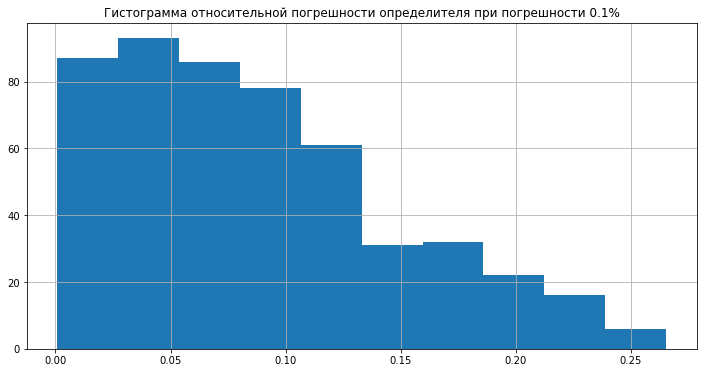

In [26]:
plt.figure(figsize=(12,6))
plt.hist(rel_errors_alpha)
plt.grid()
plt.title('Гистограмма относительной погрешности определителя при погрешности 0.1%')
plt.show()

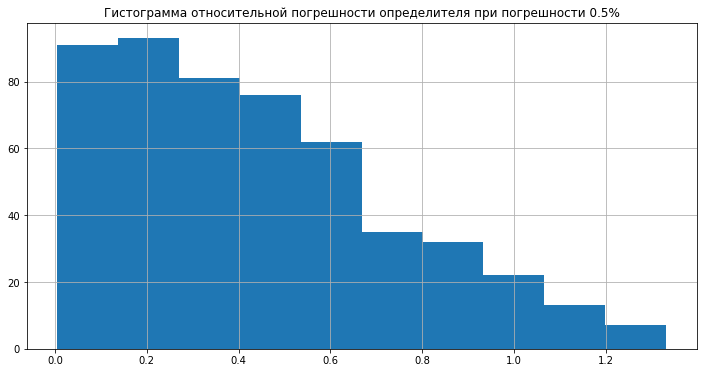

In [27]:
plt.figure(figsize=(12,6))
plt.hist(rel_errors_beta)
plt.grid()
plt.title('Гистограмма относительной погрешности определителя при погрешности 0.5%')
plt.show()

Как видно из гистограмм относительных ошибок для определителей:
1. В первом случае значения не превышают 1
2. Во втором случаем есть значения, которые превышают 1 \
Это согласуется с полученными выше результатами